In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [4]:
df_in = pd.read_csv('finaldatabase_HNP.csv')
df_in


,Size,Dose,P_density,CSKKKK,QHREDGS,RKDVY,WKYMVM,CLPFFD,QEINSSY,fold_change
0,HNP,1000,1.71,2,0,0,0,0,0,-0.723886
1,HNP,1000,1.71,0,2,0,0,0,0,-0.699132
2,HNP,1000,1.71,0,0,2,0,0,0,-0.749064
3,HNP,1000,1.71,0,0,0,2,0,0,-0.762759
4,HNP,1000,1.71,0,0,0,0,2,0,-0.690541
...,...,...,...,...,...,...,...,...,...,...
121,HNP,100,19.48,0,0,1,0,1,0,-0.280688
122,HNP,100,19.48,0,0,1,0,0,1,0.002028
123,HNP,100,19.48,0,0,0,1,1,0,-0.386585
124,HNP,100,19.48,0,0,0,1,0,1,-0.443380


(array([ 2.,  6.,  4., 11.,  8.,  5.,  1.,  1.,  0.,  2.,  6.,  1.,  0.,
         2.,  2.,  5.,  2.,  6.,  2.,  2.,  2.,  3.,  4.,  6.,  1.,  2.,
         1.,  4.,  3.,  1.,  5.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
         1.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.78266417, -0.76113787, -0.73961157, -0.71808528, -0.69655898,
        -0.67503268, -0.65350638, -0.63198008, -0.61045378, -0.58892749,
        -0.56740119, -0.54587489, -0.52434859, -0.50282229, -0.481296  ,
        -0.4597697 , -0.4382434 , -0.4167171 , -0.3951908 , -0.3736645 ,
        -0.35213821, -0.33061191, -0.30908561, -0.28755931, -0.26603301,
        -0.24450671, -0.22298042, -0.20145412, -0.17992782, -0.158401

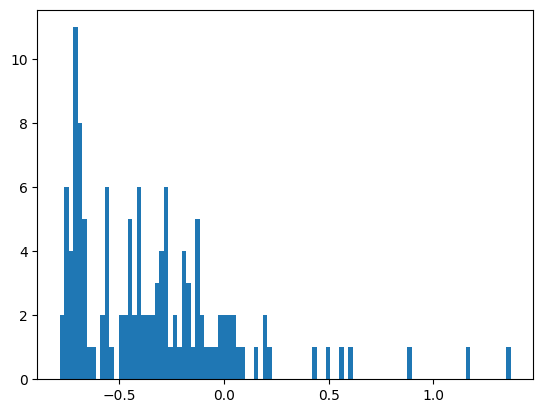

In [5]:
plt.hist(df_in.fold_change,  bins=100)

In [6]:
df_in = df_in[['Size','Dose','P_density','CSKKKK','QHREDGS','RKDVY','WKYMVM','CLPFFD','QEINSSY','fold_change']]
df_in['Polarization_group'] = 0
df_in

,Size,Dose,P_density,CSKKKK,QHREDGS,RKDVY,WKYMVM,CLPFFD,QEINSSY,fold_change,Polarization_group
0,HNP,1000,1.71,2,0,0,0,0,0,-0.723886,0
1,HNP,1000,1.71,0,2,0,0,0,0,-0.699132,0
2,HNP,1000,1.71,0,0,2,0,0,0,-0.749064,0
3,HNP,1000,1.71,0,0,0,2,0,0,-0.762759,0
4,HNP,1000,1.71,0,0,0,0,2,0,-0.690541,0
...,...,...,...,...,...,...,...,...,...,...,...
121,HNP,100,19.48,0,0,1,0,1,0,-0.280688,0
122,HNP,100,19.48,0,0,1,0,0,1,0.002028,0
123,HNP,100,19.48,0,0,0,1,1,0,-0.386585,0
124,HNP,100,19.48,0,0,0,1,0,1,-0.443380,0


In [8]:


for i in range(len(df_in)):
  if df_in.fold_change[i]<0:
    df_in.Polarization_group[i] = 1
  elif df_in.fold_change[i]>0:
    df_in.Polarization_group[i] = 0

C:\Users\kejahanmir\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kejahanmir\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
df = df_in[['Size','Dose','P_density','CSKKKK','QHREDGS','RKDVY','WKYMVM','CLPFFD','QEINSSY','Polarization_group']]
df

,Size,Dose,P_density,CSKKKK,QHREDGS,RKDVY,WKYMVM,CLPFFD,QEINSSY,Polarization_group
0,HNP,1000,1.71,2,0,0,0,0,0,1
1,HNP,1000,1.71,0,2,0,0,0,0,1
2,HNP,1000,1.71,0,0,2,0,0,0,1
3,HNP,1000,1.71,0,0,0,2,0,0,1
4,HNP,1000,1.71,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...
121,HNP,100,19.48,0,0,1,0,1,0,1
122,HNP,100,19.48,0,0,1,0,0,1,0
123,HNP,100,19.48,0,0,0,1,1,0,1
124,HNP,100,19.48,0,0,0,1,0,1,1


In [10]:
y = pd.DataFrame(df, columns=['Polarization_group']) 
X = df.drop(columns=['Polarization_group'])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1667, 
                                                    random_state=0, #We put random state to keep the same selection
                                                    stratify=y) 
                             
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train
y_train

(104, 9)
(22, 9)
(104, 1)
(22, 1)


,Polarization_group
16,1
90,1
92,1
6,1
121,1
...,...
19,1
14,1
50,0
99,1


In [11]:
# Preprocessing

## Identification of numerical and categorical columns
numeric_cols = X_train.select_dtypes(exclude=['object', 'category']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

## Transformations for numerical variables
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

## Transformations for categorical variables
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

## Preprocessor
ct = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )
 
ct.fit(X_train) # Fit all transformers using X training data. 
#We put the content inside the scaler.

#Obtain a list with the names of the new columns after doing the one-hot encoding.
colnames = pd.get_dummies(X_train).columns.to_list()

scaledTrain_df = pd.DataFrame(ct.transform(X_train), # Transform X separately by 
                              #each transformer, concatenate results.
                              index=X_train.index,
                              columns=colnames) 

scaledValidation_df = pd.DataFrame(ct.transform(X_test), # Transform X separately 
                                   #by each transformer, concatenate results.
                                   index=X_test.index,
                                   columns=colnames)

In [12]:
print(scaledTrain_df.shape)
print(scaledValidation_df.shape)

print(y_train.shape)
print(y_test.shape)

scaledTrain_df

(104, 9)
(22, 9)
(104, 1)
(22, 1)


,Dose,P_density,CSKKKK,QHREDGS,RKDVY,WKYMVM,CLPFFD,QEINSSY,Size_HNP
16,1.03923,-1.161719,-0.634083,-0.548146,1.097476,-0.606069,1.245086,-0.581388,1.0
90,1.03923,1.299137,1.056806,1.417620,-0.606069,-0.606069,-0.553372,-0.581388,1.0
92,1.03923,1.299137,1.056806,-0.548146,-0.606069,1.097476,-0.553372,-0.581388,1.0
6,1.03923,-1.161719,1.056806,1.417620,-0.606069,-0.606069,-0.553372,-0.581388,1.0
121,-0.96225,1.299137,-0.634083,-0.548146,1.097476,-0.606069,1.245086,-0.581388,1.0
...,...,...,...,...,...,...,...,...,...
19,1.03923,-1.161719,-0.634083,-0.548146,-0.606069,1.097476,-0.553372,1.196975,1.0
14,1.03923,-1.161719,-0.634083,1.417620,-0.606069,-0.606069,-0.553372,1.196975,1.0
50,1.03923,0.040320,1.056806,-0.548146,-0.606069,1.097476,-0.553372,-0.581388,1.0
99,1.03923,1.299137,-0.634083,-0.548146,1.097476,1.097476,-0.553372,-0.581388,1.0


In [13]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std

# Multinomial Logistic Regression: Modified version of logistic regression that predicts a multinomial probability 
#(i.e. more than two classes) for each input example.

# The LogisticRegression class can be configured for multinomial logistic regression by setting the “multi_class” 
#argument to “multinomial” and the “solver” argument to a solver that supports multinomial logistic regression, 
#such as “lbfgs“.

# define the multinomial logistic regression model
clf = LogisticRegression(multi_class="multinomial", solver='lbfgs')

#The multinomial logistic regression model will be fit using cross-entropy 
#loss and will predict the integer value for each integer encoded class label.

# fit the model on the whole dataset
clf.fit(scaledTrain_df, y_train.values.ravel())

print('Mean accuracy in the training:', clf.score(scaledTrain_df, y_train.values.ravel())) #Apply transforms, and score with the final estimator

y_pred = clf.predict(scaledValidation_df)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred)) #Output

Mean accuracy in the training: 0.8557692307692307
[[ 0  3]
 [ 0 19]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.86      1.00      0.93        19

    accuracy                           0.86        22
   macro avg       0.43      0.50      0.46        22
weighted avg       0.75      0.86      0.80        22



C:\Users\kejahanmir\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kejahanmir\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kejahanmir\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Feature: 0, Score: -0.22142
Feature: 1, Score: -0.05205
Feature: 2, Score: -0.15903
Feature: 3, Score: -0.05871
Feature: 4, Score: 0.14778
Feature: 5, Score: 0.00696
Feature: 6, Score: 0.08287
Feature: 7, Score: -0.02312
Feature: 8, Score: -0.00016


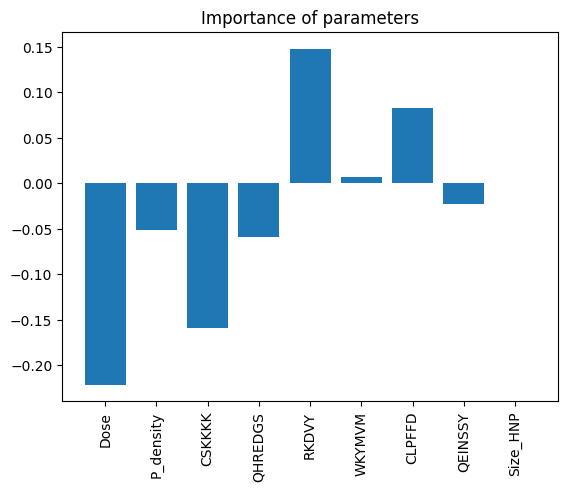

In [14]:
# get importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(len(importance)),labels=list(scaledTrain_df.columns),rotation=90)
plt.title("Importance of parameters")
plt.show()

In [ ]:
#finish

### I used randome forest model and use GINI score as importance

In [15]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(scaledTrain_df, y_train)

C:\Users\kejahanmir\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(n_estimators=500)

In [16]:
y_train_pred = rf.predict(scaledTrain_df)
y_test_pred = rf.predict(scaledValidation_df)

In [17]:
rf.score(scaledValidation_df,y_test)

0.8636363636363636

#### different ways of calculating  Accuracy

In [18]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.8636363636363636

In [19]:
from sklearn.metrics import balanced_accuracy_score     #because the dataset is very imbalanced    balance accuracy is better to used as metrics
balanced_accuracy_score(y_test, y_test_pred)

0.5

In [20]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[ 0,  3],
       [ 0, 19]], dtype=int64)

In [21]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

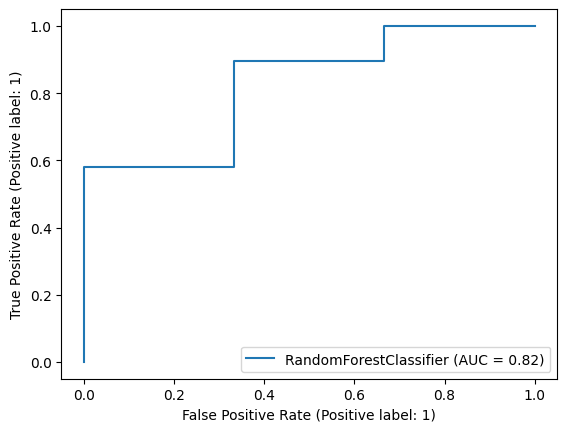

In [22]:
# ROC curve
# ROC curve    for sklearn from version 1.2 or newer
from sklearn.metrics import RocCurveDisplay
rf_disp_test = RocCurveDisplay.from_estimator(rf, scaledValidation_df, y_test)

### Feature importance

In [23]:
#  feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

#  feature names
feature_names = pd.Series(scaledTrain_df.columns, name = 'Feature')

In [24]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

,Feature,Gini
0,Dose,0.099817
1,P_density,0.337234
2,CSKKKK,0.113772
3,QHREDGS,0.081551
4,RKDVY,0.072016
5,WKYMVM,0.081387
6,CLPFFD,0.115898
7,QEINSSY,0.098326
8,Size_HNP,0.000000


Text(0.5, 0, 'Feature Importance')

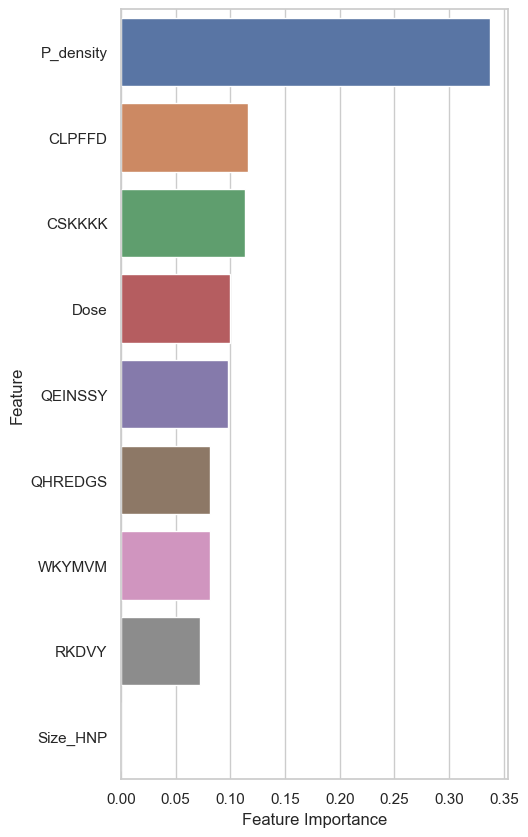

In [25]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")